# Collected data from Linkedin jobs postings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
title = "Software Developer"  
location = "Linköping"
date = "2025-12-09"
NUMBER_OF_JOBS_TO_FETCH = 600
SAVE_DATA = True
print(f"The data that was collected was for the role {title} in {location}, there was {NUMBER_OF_JOBS_TO_FETCH} job posts requsted")

The data that was collected was for the role Software Developer in Linköping, there was 600 job posts requsted


## The raw data 

This is how the data looked like that was collected

In [3]:
jobs_df = pd.read_csv(f'./results/jobs_{title}_{location}_{date}.csv')
jobs_df.head(10)

,job_title,company_name,location,time_posted,num_applicants
0,Embedded Software Developer,Softube AB,Linköping,3 weeks ago,0
1,Developer: PC-plattformar & MCU-utveckling,Saab,Linköping,1 week ago,0
2,System Developer to Linköping!,TMC Sweden,Linköping,3 weeks ago,33
3,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,1 week ago,0
4,Software Engineer,Voyado,Norrköping,3 days ago,66
5,Fullstack Javautvecklare,NDP IT AB,Linköping,1 week ago,0
6,AI Software Developer,Knowit,Linköping,3 weeks ago,0
7,Utvecklare Java,Nexer Group,Linköping,2 weeks ago,0
8,Software Engineer,Voyado,Linköping,2 weeks ago,43
9,Erfaren .Net-utvecklare,XLENT,Norrköping,2 months ago,0


In [4]:
jobs_df["company_name"].unique()

array(['Softube AB', 'Saab', 'TMC Sweden', 'Sectra', 'Voyado',
       'NDP IT AB', 'Knowit', 'Nexer Group', 'XLENT', 'CGI', 'Prevas AB',
       'INUstyr AB', 'Syntronic - A Global Design House', 'Qualcomm',
       'Combine', 'Friday', 'ALTEN Sweden', 'RemaSawco', 'Skill', 'FOI',
       'Axis Communications'], dtype=object)

In [5]:


consulting_companies = [
    "TogetherTech",
    "Nexer Group",
    "Syntronic - A Global Design House",
    "Combitech Svergie",
    "Combitech Sverige",
    "Deploja",
    "ALTEN Sweden",
    "Rasulson Consulting AB",
    "CGI",
    "Prevas AB",
    "Knowit",
    "XLENT",
    "Skill",
    "Friday",
    "TMC Sweden",
    "NDP IT AB",
    "Combine",
]
print(f"Number of job with consulting jobs included {len(jobs_df)}")
n_consulting = len(jobs_df)
jobs_df = jobs_df[~jobs_df["company_name"].isin(consulting_companies)]
print(f"Number of job with out consulting jobs {len(jobs_df)}")
print(f"% of jobs is consulting {1 - len(jobs_df)/n_consulting}")
jobs_df.head()

Number of job with consulting jobs included 32
Number of job with out consulting jobs 17
% of jobs is consulting 0.46875


,job_title,company_name,location,time_posted,num_applicants
0,Embedded Software Developer,Softube AB,Linköping,3 weeks ago,0
1,Developer: PC-plattformar & MCU-utveckling,Saab,Linköping,1 week ago,0
3,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,1 week ago,0
4,Software Engineer,Voyado,Norrköping,3 days ago,66
8,Software Engineer,Voyado,Linköping,2 weeks ago,43


In [6]:
skill_usage = pd.read_csv(f"./results/skills_{title}_{location}_{date}.csv")
skill_usage.sort_values(by="Number of Job Postings", inplace=True, ascending=False)
skill_usage.reset_index(inplace=True)
skill_usage.drop(columns=["index"], inplace=True)
skill_usage.head(25)

,Programming Skill,Number of Job Postings
0,Python,13
1,Git,12
2,C++,12
3,Linux,9
4,C#,9
5,Azure,8
6,Java,7
7,SQL,7
8,Kubernetes,7
9,Ada,6


--- 

### Locations

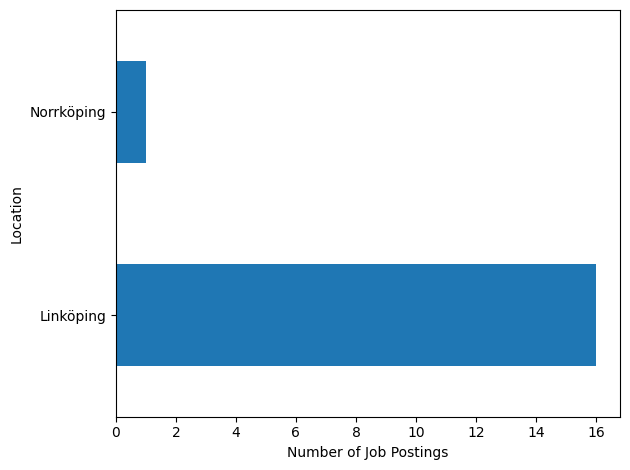

In [7]:
jobs_df["location"].value_counts().head(15).plot(kind='barh')
plt.ylabel('Location')
plt.xlabel('Number of Job Postings')
plt.tight_layout()

---

### Companies

The companies with the most number of job postings

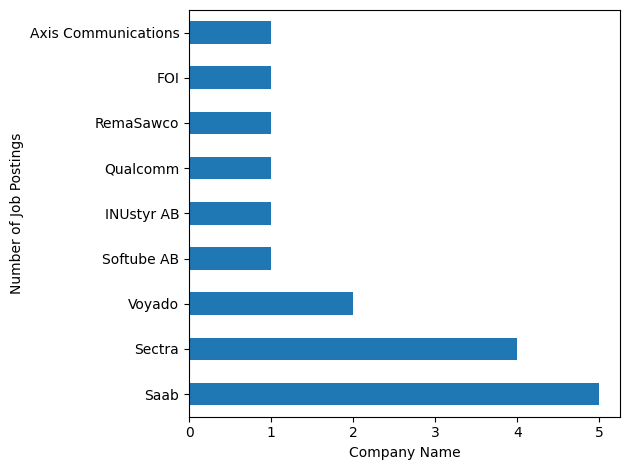

In [8]:
jobs_df["company_name"].value_counts().head(15).plot(kind='barh')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

We can also look at the number of days that diffrent companies job posting stay up. 
This tell us how diffuclt it is for diffrent companies to fill roles. 

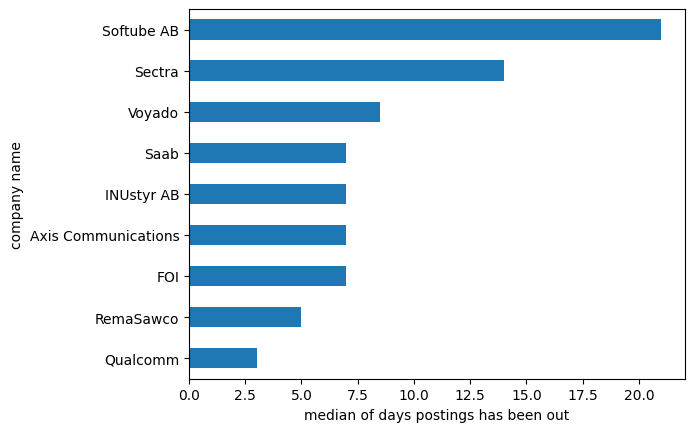

In [9]:
time_df = jobs_df.copy()
time_df.dropna(inplace=True)

def convert_to_days(text):
    num, unit, _ = text.split(" ")
    num = int(num)
    if "days" == unit:
        return num
    if unit in ["week", "weeks"]: 
        return num * 7
    if unit in ["month", "months"]: 
        return num * 30
    if "years" == unit:
        return num * 365
    return None

time_df["time_posted"] = time_df["time_posted"].apply(convert_to_days)
grouped_df = time_df.groupby("company_name", as_index=False)["time_posted"].median()
grouped_df.sort_values("time_posted", inplace=True)
grouped_df.head(20).plot.barh(x="company_name", y="time_posted", legend=False)
plt.xlabel('median of days postings has been out')
plt.ylabel('company name')
plt.show()

Then we can look at how many pepole have applyied to diffrent companies, this migt also be an indicator on that they have a hard time finding the right person. 

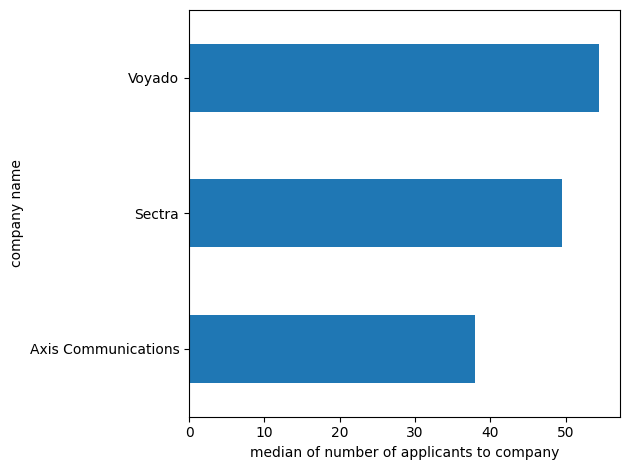

In [10]:
hot_company = jobs_df.copy()
hot_company = hot_company.groupby("company_name", as_index=False)["num_applicants"].median()
hot_company.sort_values("num_applicants", inplace=True)
hot_company = hot_company[hot_company["num_applicants"] > 1]
hot_company.plot.barh(x="company_name", y="num_applicants", legend=False)
plt.xlabel('median of number of applicants to company')
plt.ylabel('company name')
plt.tight_layout()

---


## The applicant

The job title can tell ut what type of person companies are looking fore. 

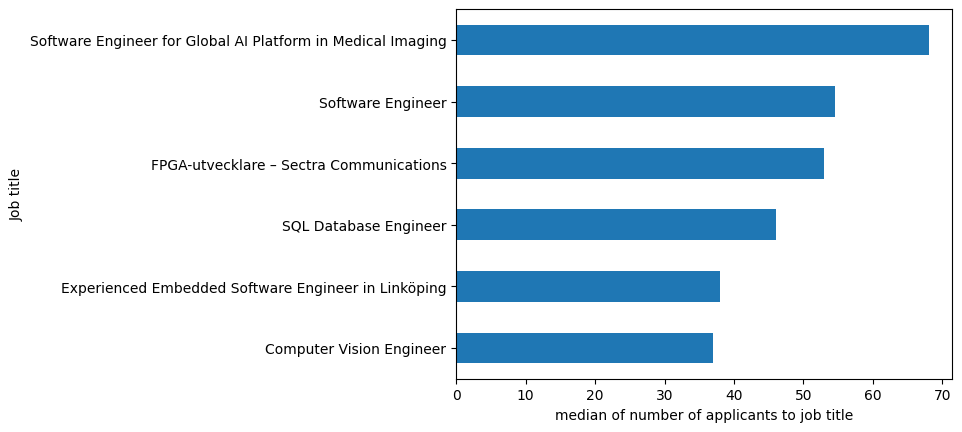

In [11]:

hot_title = jobs_df.copy()
hot_title = hot_title.groupby("job_title", as_index=False)["num_applicants"].median()
hot_title.sort_values("num_applicants", inplace=True)
hot_title = hot_title[hot_title["num_applicants"] > 1]
hot_title.plot.barh(x="job_title", y="num_applicants", legend=False)
plt.xlabel('median of number of applicants to job title')
plt.ylabel('Job title')
plt.show()

#### Skills with the most requests 

In [12]:
skill_usage = pd.read_csv(f"./results/skill_usage_{title}_{location}_{date}.csv")
skill_usage.head(20)

,index,Number of Companies
0,Python,10
1,Git,10
2,C++,9
3,C#,7
4,Linux,7
5,Java,7
6,Azure,6
7,SQL,6
8,Kubernetes,6
9,Docker,5
